# **IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **LOADING THE DATASET**

In [2]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# **EDA AND VISUALIZATION**

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<AxesSubplot:xlabel='Survived', ylabel='count'>

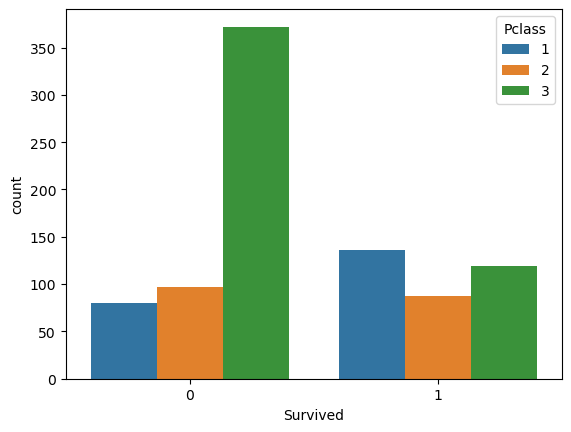

In [8]:
sns.countplot(x='Survived', data = df, hue ='Pclass')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Age', ylabel='Density'>

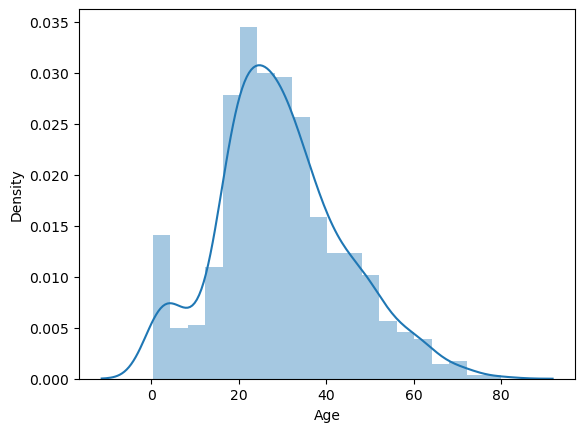

In [9]:
sns.distplot(df['Age'])

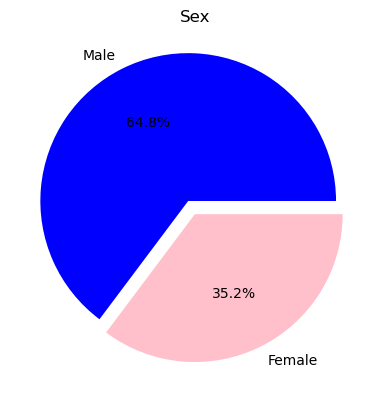

In [10]:
plt.pie(df.Sex.value_counts(),[0.1,0],labels=["Male","Female"],autopct="%1.1f%%",colors=["blue","pink"])
plt.title("Sex")
plt.show()

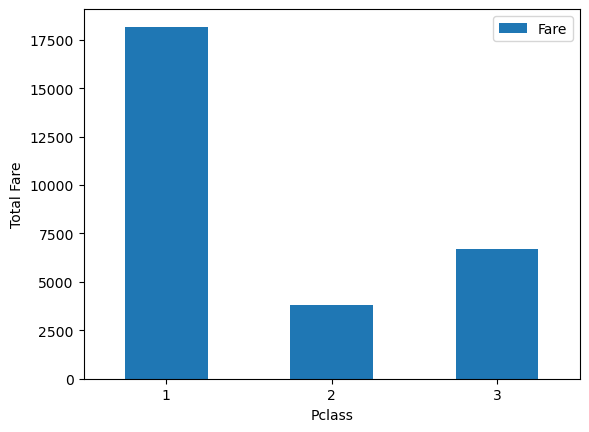

In [11]:
class_fare = df.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

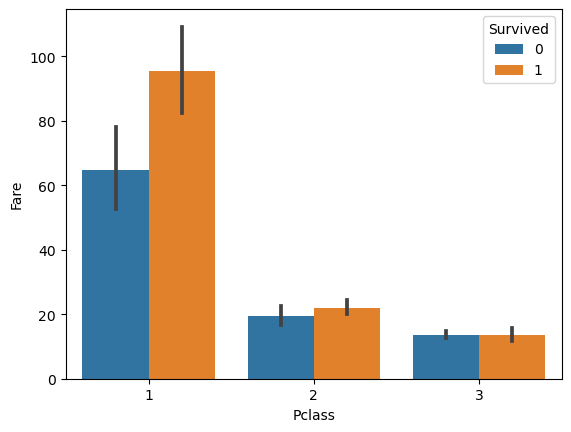

In [12]:
sns.barplot(data=df, x='Pclass', y='Fare', hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

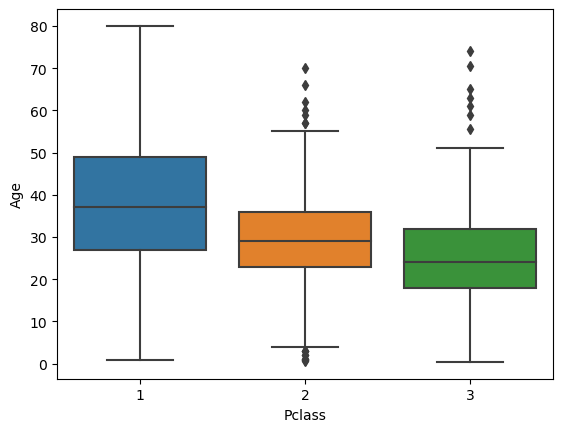

In [13]:
sns.boxplot(x='Pclass', y='Age',data=df)

<AxesSubplot:>

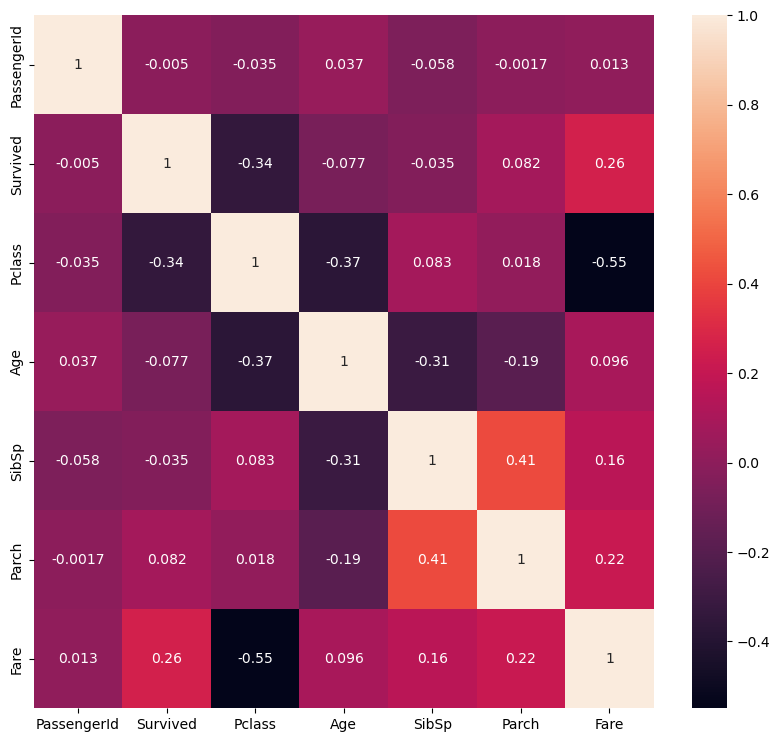

In [14]:
plt.figure(figsize=[10,9])
sns.heatmap(df.corr(),annot=True)

# **PREPROCESSING**

**CHECKING FOR NULL VALUES**

In [15]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**DROPPING SOME UNECCESSARY COLUMNS**

In [18]:
df.drop(['PassengerId','Name','Cabin','Ticket'], axis=1, inplace=True)
df_test.drop(['Name','Cabin','Ticket'], axis=1, inplace=True)

**FILLING MISSING VALUES IN 'Age' COLUMN**

In [19]:
print(df[df['Pclass'] == 1]['Age'].mean()) 
print(df[df['Pclass'] == 2]['Age'].mean()) 
print(df[df['Pclass'] == 3]['Age'].mean())

38.233440860215055
29.87763005780347
25.14061971830986


In [20]:
print(df_test[df_test['Pclass'] == 1]['Age'].mean()) 
print(df_test[df_test['Pclass'] == 2]['Age'].mean()) 
print(df_test[df_test['Pclass'] == 3]['Age'].mean())

40.91836734693877
28.7775
24.02794520547945


In [21]:
def fill_in_na_values(cols):
  age = cols[0]
  pclass = cols[1]
  if pd.isnull(age):
    if pclass == 1:
      return round (df[df['Pclass'] == 1]['Age'].mean()) 
    elif pclass == 2:
      return round (df[df['Pclass'] == 2]['Age'].mean()) 
    elif pclass == 3:
      return round(df[df['Pclass'] == 3]['Age'].mean())
  else:
    return age

df['Age'] = df[['Age','Pclass']].apply(fill_in_na_values, axis = 1)
df_test['Age'] = df_test[['Age','Pclass']].apply(fill_in_na_values, axis = 1)

In [22]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [23]:
df.fillna(df.mean())
df_test.fillna(df.mean())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,25.0,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,25.0,0,0,8.0500,S


In [24]:
df_test['Fare']=df_test['Fare'].fillna(df_test['Fare'].median())

In [25]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [26]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

# **CHECK FOR CATEGORICAL COLUMNS AND PERFORM ENCODING**

**Label Encoding**

In [27]:
#Checking for Categorical Columns
df.select_dtypes(include=['object']).columns.tolist()

['Sex', 'Embarked']

In [28]:
#Checking for Categorical Columns
df_test.select_dtypes(include=['object']).columns.tolist()

['Sex', 'Embarked']

In [29]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [30]:
df_test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [31]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [32]:
df_test['Sex'].unique()

array(['male', 'female'], dtype=object)

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Sex"]= le.fit_transform(df["Sex"])
print(df["Sex"])

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64


In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_test["Sex"]= le.fit_transform(df_test["Sex"])
print(df_test["Sex"])

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int64


In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Embarked"]= le.fit_transform(df["Embarked"])
print(df["Embarked"])

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64


In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_test["Embarked"]= le.fit_transform(df_test["Embarked"])
print(df_test["Embarked"])

0      1
1      2
2      1
3      2
4      2
      ..
413    2
414    0
415    2
416    2
417    0
Name: Embarked, Length: 418, dtype: int64


In [37]:
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,1305,3,1,25.0,0,0,8.0500,2
414,1306,1,0,39.0,0,0,108.9000,0
415,1307,3,1,38.5,0,0,7.2500,2
416,1308,3,1,25.0,0,0,8.0500,2


# **SPLITTING INTO INDEPENDENT AND DEPENDENT VARIABLES**

In [38]:
X_train = df.drop("Survived", axis=1)
y_train = df["Survived"]
X_test  = df_test.drop("PassengerId", axis=1).copy()

In [39]:
print(X_test)

     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
0         3    1  34.5      0      0    7.8292         1
1         3    0  47.0      1      0    7.0000         2
2         2    1  62.0      0      0    9.6875         1
3         3    1  27.0      0      0    8.6625         2
4         3    0  22.0      1      1   12.2875         2
..      ...  ...   ...    ...    ...       ...       ...
413       3    1  25.0      0      0    8.0500         2
414       1    0  39.0      0      0  108.9000         0
415       3    1  38.5      0      0    7.2500         2
416       3    1  25.0      0      0    8.0500         2
417       3    1  25.0      1      1   22.3583         0

[418 rows x 7 columns]


In [40]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
X_train

array([[ 0.82737724,  0.73769513, -0.55018473, ..., -0.47367361,
        -0.50244517,  0.58111394],
       [-1.56610693, -1.35557354,  0.66149881, ..., -0.47367361,
         0.78684529, -1.93846038],
       [ 0.82737724, -1.35557354, -0.24726385, ..., -0.47367361,
        -0.48885426,  0.58111394],
       ...,
       [ 0.82737724, -1.35557354, -0.32299407, ...,  2.00893337,
        -0.17626324,  0.58111394],
       [-1.56610693,  0.73769513, -0.24726385, ..., -0.47367361,
        -0.04438104, -1.93846038],
       [ 0.82737724,  0.73769513,  0.20711748, ..., -0.47367361,
        -0.49237783, -0.67867322]])

In [42]:
def classify(model):
    model.fit(X_train, y_train)
    print('Accuracy:', model.score(X_train, y_train))

In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model)

Accuracy: 0.8035914702581369


In [44]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy: 0.9809203142536476


In [45]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model)

Accuracy: 0.9652076318742986


In [46]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=0)
classify(model)

Accuracy: 0.8956228956228957


In [47]:
from sklearn import svm
model = svm.LinearSVC(random_state=20)
classify(model)

Accuracy: 0.8058361391694725


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [48]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()  
classify(model)

Accuracy: 0.792368125701459


In [49]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy: 0.9809203142536476


In [50]:
classifier = RandomForestClassifier().fit(X_train, y_train)

In [51]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [52]:
subm = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": y_pred
    })

In [53]:
subm.to_csv('submission.csv', index=False)

In [54]:
pred_df = pd.read_csv('submission.csv')
pred_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


<AxesSubplot:>

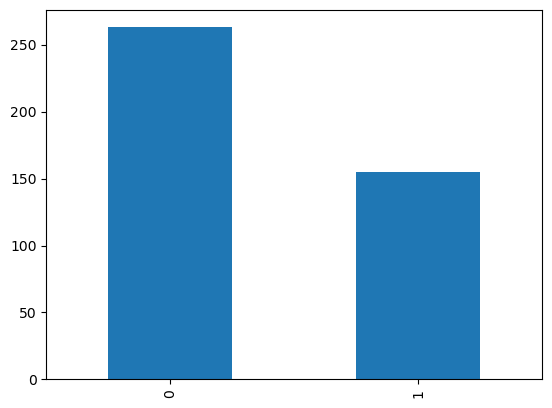

In [55]:
subm['Survived'].value_counts().plot(kind='bar')